# Trees, Forests, and Ensembles

![japanese maple](assets/trees/japanese-maple-2947680_640.jpg)

(image: [pixabay](https://pixabay.com/en/japanese-maple-foliage-green-leaves-2947680/))

# Topics

- Decision Trees
- Ensemble Forests
- Classification
- Regression

## Where are we?

(lost in the forest?)

![spot the trees](assets/linear-regression/machine-learning-cheet-sheet.png)

(image: [sas.com](https://www.sas.com/en_us/insights/analytics/machine-learning.html))

## Decision Trees
- Classification: predicts a class
- Regression: predicts a number

http://scikit-learn.org/stable/modules/tree.html

## Decision Trees

Advantanges:
- Easy to visualize and understand
- $O(log(N))$ prediction cost
- Flexible for simple tasks: binary / multi-class classification, regression

## Decision Trees

Disadvantages:
- Overfitting
- Unbalanced dataset can cause biased trees
- Instability: small changes in data can result in completely different tree

## Ensemble Methods

![ensemble](assets/trees/teamwork-2499638_960_720.jpg)

(image: [pixabay](https://pixabay.com/en/teamwork-team-gear-board-chalk-2499638/))

## Ensemble Methods
"Teaming up weaker models to create a stronger model"

- Random Forest
- AdaBoost
- Gradient Boosted Trees
- etc

http://scikit-learn.org/stable/modules/ensemble.html

### Random Forests

- Fits a few decision trees on subsets of the dataset, then averages the results
  - Improves accuracy and reduces overfitting
  - https://amueller.github.io/COMS4995-s18/slides/aml-10-021918-trees-forests/#36
- Classifier: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- Regressor: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

### AdaBoost

- http://scikit-learn.org/stable/modules/ensemble.html#adaboost
- Fit a sequence of small decision trees on repeatedly modified versions of data
  
  - adjust weights on the training samples
    - incorrectly predicted training sample => more weight
    - correctly predicted sample => less weight
    
    
- Combine predictions using sum or majority vote

- "Samples that were gotten wrong get more attention"


### AdaBoost

- Classifier: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
- Regressor: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

### Gradient Boosted Trees

- Optimized using Gradient Descent
- Better generalization
- Classifier: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
- Regressor: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

### Gradient Boosting

![really?](assets/trees/blog_Gradient-Boosting-Image.png)

(image: http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)

### Gradient Boosting: Concept

1. Nth tree has some prediction error.

2. Train the next (N+1)th tree to "boost" the model so that it can compensate for the gap (error) from the Nth tree. 

3. Add up the predictions from the all trees to fill up the gaps.

### Gradient Boosting: Concept

1. Train first tree, measure training error ("residuals")
$$F_1(x) = y$$
2. Train second tree on the residuals, using dataset $\big(x, y-F_1(x)\big)$
$$h_1(x) = y - F_1(x)$$
3. Combine to get a better model
$$F_2(x) = F_1(x) + h_1(x)$$

In [ ]:
# Won't run
f1 = DecisionTreeClassifier()
f1.fit(X, y)
f1_pred = f1.predict(X)

# Train second tree on residuals
h1 = DecisionTreeClassifier()
h1.fit(X, (y - f1_pred)) # with cross validation or forest
h1_pred = h1.predict(X)

# combine to get a better model
f2_pred = f1_pred + h1_pred

### Gradient Boosting: Concept

General formulation:
$$F_{m+1}(x) = F_m(x) + h_m(x) = y$$

Where $m$ is tuned by cross validation

### Gradient Boosting: Gradient Descent

- Objective: minimize cost function: $L\big(y, F(x)\big)$
- Apply Tree Boosting, but compute residuals from the **gradients of the cost function**
- $n$ training examples $(x_1, ... x_n)$
- Residual for the $i^{th}$ example, $m^{th}$ tree:

$$r_{im} = -\biggl[\frac{\partial{L\big(y_i, F_{m-1}(x_i)\big)}}{\partial{F_{m-1}(x_i)}}\biggr]$$

### Gradient Boosting: Algorithm

1. Compute residual using $F_{m-1}(x_i)$ and $y_i$
2. Train decision tree $h_m(x)$, using dataset ${(x_i, r_{im})}$
3. Compute update multiplier:
$$\gamma_m = \underset{\gamma}{\arg \min} \sum^n_{i=1} L\big(y, F_{m-1} + \gamma h_{m}(x)\big)$$
4. Get next model using multiplier:
$$F_m(x) = F_{m-1}(x) + \gamma_mh_m(x)$$

### XGBoost

eXtreme Gradient Boosting
- A parallel, distributed gradient boosting library
- https://github.com/dmlc/xgboost
- https://xgboost.readthedocs.io/en/latest/model.html

## Evaluation Metrics

- General metrics for Classification and Regression
- Decision Tree-specific metrics


### Decision Tree-specific Metrics
- Gini: gini impurity, which measures the quality of a split
  - greater than 0: split needed
  - 0: all cases fall in 1 category
- Information gain / entropy
  - pick the split with the highest information gain

## Workshop: Classification with Decision Trees

Credits: http://scikit-learn.org/stable/modules/tree.html#classification

## Setup

We'll be using Graphviz to visualize the decision tree after training it.

Add this module to your `mldds02` conda environment:

```
conda install python-graphviz
```

## Goal

Train and compare decision tree-based classifiers to predict the `sector` from research and development expenditure type, cost type, and expenditure amount.

## Dataset

#### Research and Development Expenditure by Type of Cost

https://data.gov.sg/dataset/research-and-development-expenditure-by-type-of-cost

1. Download dataset from the above URL
2. Extract the folder and note the path for use in `read_csv` below.

## Prepare Dataset

1. Encode string labels to numbers
2. Ensure dataset is balanced

In [172]:
import pandas as pd

df = pd.read_csv('../data/research-and-development-expenditure-by-type-of-cost/research-and-development-expenditure-by-type-of-cost.csv',

                 usecols=['sector', 'type_of_expenditure', 'type_of_cost', 'rnd_expenditure'])
df.head()

,sector,type_of_expenditure,type_of_cost,rnd_expenditure
0,Private Sector,Capital Expenditure,"Land, Buildings & Other Structures",231.79
1,Private Sector,Capital Expenditure,"Vehicles, Plant, Machinery & Equipment",670.82
2,Private Sector,Manpower Expenditure,Researchers,1914.63
3,Private Sector,Manpower Expenditure,Technicians,75.70
4,Private Sector,Manpower Expenditure,Other Supporting Staff,134.54


### Label Encoding for Classification

Training data needs to be numeric.

To convert string labels to numbers, we will do something called "label encoding".

There are multiple ways to do this: http://pbpython.com/categorical-encoding.html
- Dummy columns
- Integer labels

For this dataset, we'll try assigning integer labels to each unique string value in the column.

In [173]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()

# encode sector from strings to integer labels
df['sector_c'] = le1.fit_transform(df['sector'])

le2 = LabelEncoder()
df['type_of_expenditure_c'] = le2.fit_transform(df['type_of_expenditure'])

le3 = LabelEncoder()
df['type_of_cost_c'] = le3.fit_transform(df['type_of_cost'])
df.head(10)

,sector,type_of_expenditure,type_of_cost,rnd_expenditure,sector_c,type_of_expenditure_c,type_of_cost_c
0,Private Sector,Capital Expenditure,"Land, Buildings & Other Structures",231.79,2,0,0
1,Private Sector,Capital Expenditure,"Vehicles, Plant, Machinery & Equipment",670.82,2,0,5
2,Private Sector,Manpower Expenditure,Researchers,1914.63,2,1,3
3,Private Sector,Manpower Expenditure,Technicians,75.70,2,1,4
4,Private Sector,Manpower Expenditure,Other Supporting Staff,134.54,2,1,2
5,Private Sector,Other Operating Expenditure,Other Operating Costs,2188.18,2,2,1
6,Government Sector,Capital Expenditure,"Land, Buildings & Other Structures",27.17,0,0,0
7,Government Sector,Capital Expenditure,"Vehicles, Plant, Machinery & Equipment",30.05,0,0,5
8,Government Sector,Manpower Expenditure,Researchers,304.45,0,1,3
9,Government Sector,Manpower Expenditure,Technicians,33.21,0,1,4


### Ensuring Balanced Dataset for Decision Tree Algorithms

For decision trees, it is important to balance the dataset to reduce class bias.

If a dataset contains too many samples of one sector (e.g. 'Private Sector', the tree will learn to pick that sector more frequently, which means it's no better than random selection.

In [174]:
df.sector.unique()

array(['Private Sector', 'Government Sector', 'Higher Education Sector',
       'Public Research Institutes'], dtype=object)

In [175]:
le1.classes_

array(['Government Sector', 'Higher Education Sector', 'Private Sector',
       'Public Research Institutes'], dtype=object)

In [176]:
# Detect if a dataset is unbalanced
df['sector_c'].value_counts()

3    30
2    30
1    30
0    30
Name: sector_c, dtype: int64

We got lucky here with the dataset, as there are equal numbers of value_counts for each sector.

Suppose we need to balance the dataset, we can use this technique:

In [177]:
# simulate an unbalanced dataset by replicating columns for sector_c=0

df.loc[df.sector_c == 0]

# make a copy so as not to affect our original df
unbalanced_df = pd.concat([df, df.loc[df.sector_c == 0]], ignore_index=True)

# show the unbalanced dataset, sector_c = 0 will have double the number of entries
unbalanced_df['sector_c'].value_counts()

0    60
3    30
2    30
1    30
Name: sector_c, dtype: int64

In [178]:
sector_groups = unbalanced_df.groupby('sector_c')

# use pandas.DataFrame.sample to create a DataFrame
# where all sector groups are re-sampled to the smallest sized group
balanced_df = sector_groups.apply(lambda x: x.sample(sector_groups.size().min())).\
    reset_index(drop=True)

# show the balanced_df, all sectors are balanced
balanced_df['sector_c'].value_counts()

3    30
2    30
1    30
0    30
Name: sector_c, dtype: int64

## Select Features

We'll now break our DataFrame into data and target.

In [179]:
data = df[['rnd_expenditure', 'type_of_expenditure_c', 'type_of_cost_c']]
target = df['sector_c']

In [180]:
data.head()

,rnd_expenditure,type_of_expenditure_c,type_of_cost_c
0,231.79,0,0
1,670.82,0,5
2,1914.63,1,3
3,75.70,1,4
4,134.54,1,2


In [181]:
target.head()

0    2
1    2
2    2
3    2
4    2
Name: sector_c, dtype: int64

## Train the Decision Tree Classifier

1. Shuffle and split the data set into train and test
2. Train a `DecisionTreeClassifier`

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [182]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(data, target,
                                                    random_state=42)

In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# scale
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

dtc = DecisionTreeClassifier(random_state=42, max_leaf_nodes=10, max_depth=5)
dtc.fit(train_X_scaled, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [184]:
dtc.predict(test_X_scaled)

array([3, 3, 1, 1, 2, 0, 3, 0, 0, 3, 1, 1, 1, 1, 3, 3, 1, 3, 0, 1, 3, 0,
       1, 1, 1, 1, 1, 1, 1, 2], dtype=int64)

In [185]:
pred = dtc.predict(test_X_scaled)
    
print(le1.inverse_transform(pred))

['Public Research Institutes' 'Public Research Institutes'
 'Higher Education Sector' 'Higher Education Sector' 'Private Sector'
 'Government Sector' 'Public Research Institutes' 'Government Sector'
 'Government Sector' 'Public Research Institutes'
 'Higher Education Sector' 'Higher Education Sector'
 'Higher Education Sector' 'Higher Education Sector'
 'Public Research Institutes' 'Public Research Institutes'
 'Higher Education Sector' 'Public Research Institutes'
 'Government Sector' 'Higher Education Sector'
 'Public Research Institutes' 'Government Sector'
 'Higher Education Sector' 'Higher Education Sector'
 'Higher Education Sector' 'Higher Education Sector'
 'Higher Education Sector' 'Higher Education Sector'
 'Higher Education Sector' 'Private Sector']


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Evaluate Metrics: Classification Accuracy

Since this is a classification task, the metrics we used for Logistic Regression also apply here, such as
- Precision, recall
- Confusion matrix
- Accuracy

References:
- http://scikit-learn.org/stable/modules/classes.html#classification-metrics
- http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

In [186]:
from sklearn.metrics import classification_report, confusion_matrix

pred_y = dtc.predict(test_X_scaled)

print(classification_report(test_y, pred_y))

cm = confusion_matrix(test_y, pred_y)
print(cm)

             precision    recall  f1-score   support

          0       0.20      0.17      0.18         6
          1       0.33      0.50      0.40        10
          2       1.00      0.33      0.50         6
          3       0.38      0.38      0.38         8

avg / total       0.45      0.37      0.37        30

[[1 4 0 1]
 [3 5 0 2]
 [0 2 2 2]
 [1 4 0 3]]


## Visualizing the Decision Tree

We'll visualize the learned decision tree using graphviz, to see what type of rules it has learnt from the training data.

https://graphviz.readthedocs.io/en/stable/api.html

In [187]:
from sklearn.tree import export_graphviz
import graphviz

def visualize_tree(fitted_tree, feature_names, target_names, filename):
    """
    Args:
        fitted_tree: the fitted decision tree. If using ensemble methods
            pick the first estimator using model.estimators[0]
        feature_names: array containing the feature names
        target_names: array containing the target labels
        filename: the filename to save the .dot file
    """
    export_graphviz(fitted_tree, out_file=filename,
                    feature_names=feature_names,
                    class_names=target_names,
                    filled=True, rounded=True)

    source = graphviz.Source.from_file(filename)
    source.render(view=True)

In [188]:
feature_names=['rnd_expenditure', 'type_of_expenditure', 'type_of_cost']

# target_names=df['sector'].unique() # wrong
target_names = le1.classes_ # label encoder's order

filename = '../data/research-and-development-expenditure-by-type-of-cost/govt_sector_by_expenditure_tree_maxleaf10.dot'

visualize_tree(dtc, feature_names, target_names, filename)

CalledProcessError: Command '['dot.bat', '-Tpdf', '-O', '../data/research-and-development-expenditure-by-type-of-cost/govt_sector_by_expenditure_tree_maxleaf10.dot']' returned non-zero exit status 1.

### Feature importance

https://medium.com/the-artificial-impostor/feature-importance-measures-for-tree-models-part-i-47f187c1a2c3

In [ ]:
# 
# Gini importance of each feature
#
# number of times a feature is used to split a node,
# weighted by the number of samples it splits.

print(dtc.feature_importances_)

In [ ]:
data.columns

In [ ]:
n_features = len(data.columns)

plt.barh(range(n_features), dtc.feature_importances_)
plt.yticks(range(n_features), data.columns)

## Exercise - Decision Tree Classification using Entropy

Repeat the steps above to:
1. Train a decision tree using the 'entropy' criteria using the training set
2. Evaluate the classification metrics
3. Visualize the decision tree

Which criteria performs better?

In [ ]:
# Your code here















## Visualizing Decision Tree Surfaces

Here's a neat trick to try in lieu of what we saw with clustering.

Credits: http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html

In [ ]:
# Adapted from: http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_surface(classifier, n_classes, X, y, title):
    """Plots a decision surface using pair-wise combination
    of features
    Args:
        classifier - the decision tree classifier
        n_classes - the number of classes
        X - the data
        y - the labels
        title - the plot title
    """
    plot_colors = 'ryb'
    plot_step = 0.02

    plt.figure(figsize=(15, 10))

    for pairidx, pair in enumerate([[0, 1], [0, 2], [1, 2]]):
        # We only take the two corresponding features
        x = X.values[:, pair]

        clf = classifier.fit(x, y)

        # Plot the decision boundary
        plt.subplot(2, 3, pairidx + 1)

        x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
        y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel(feature_names[pair[0]])
        plt.ylabel(feature_names[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(x[idx, 0], x[idx, 1], c=color, label=target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

    plt.suptitle(title)
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")
    plt.show()

In [ ]:
n_classes = len(target.unique())
plot_decision_surface(DecisionTreeClassifier(), n_classes, train_X, train_y,
                      "Decision surface of a Decision Tree classifier using paired features")

In [ ]:
# To get the category label mapping
df[['type_of_expenditure', 'type_of_expenditure_c']].drop_duplicates()

In [ ]:
df[['type_of_cost', 'type_of_cost_c']].drop_duplicates()

In [ ]:
df[['sector', 'sector_c']].drop_duplicates()

## Random Forest Classifier with GridSearchCV

Now that we have our baseline tree, the next step is to try an ensemble method, such as Random Forest.

Let's also maximize our chances of getting the best model by doing Grid Search cross-validation.

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier?

In [192]:
from sklearn.model_selection import GridSearchCV

# Use GridSearchCV to select the optimum hyperparameters
gs_rfc = GridSearchCV(RandomForestClassifier(random_state=42),
                      {'max_depth': [5, 6, 7, 8],
                       'n_estimators': [7, 9, 10],
                       'min_samples_split': [2, 4, 8]},
                      verbose=1)

gs_rfc.fit(train_X, train_y)

# select the best estimator
print('Best score:', gs_rfc.best_score_)
print('Best parameters:', gs_rfc.best_params_)

# predict
pred_y = gs_rfc.predict(test_X)

# evaluation metrics
print(classification_report(test_y, pred_y))
cm = confusion_matrix(test_y, pred_y)
print(cm)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best score: 0.7333333333333333
Best parameters: {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 10}
             precision    recall  f1-score   support

          0       0.57      0.67      0.62         6
          1       0.50      0.40      0.44        10
          2       1.00      1.00      1.00         6
          3       0.44      0.50      0.47         8

avg / total       0.60      0.60      0.60        30

[[4 1 0 1]
 [2 4 0 4]
 [0 0 6 0]
 [1 3 0 4]]


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    1.1s finished


In [191]:
gs_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [193]:
gs_rfc.best_estimator_.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1608637542, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1273642419, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_frac

In [198]:
# Visualize the first tree in the forest
rfc = gs_rfc.best_estimator_

visualize_tree(rfc.estimators_[0], feature_names, target_names,
               '../data/research-and-development-expenditure-by-type-of-cost/govt_sector_by_expenditure_rf_first.dot')

In [199]:
# Visualize the last tree in the forest
visualize_tree(rfc.estimators_[-1], feature_names, target_names,
               '../data/research-and-development-expenditure-by-type-of-cost/govt_sector_by_expenditure_rf_last.dot')

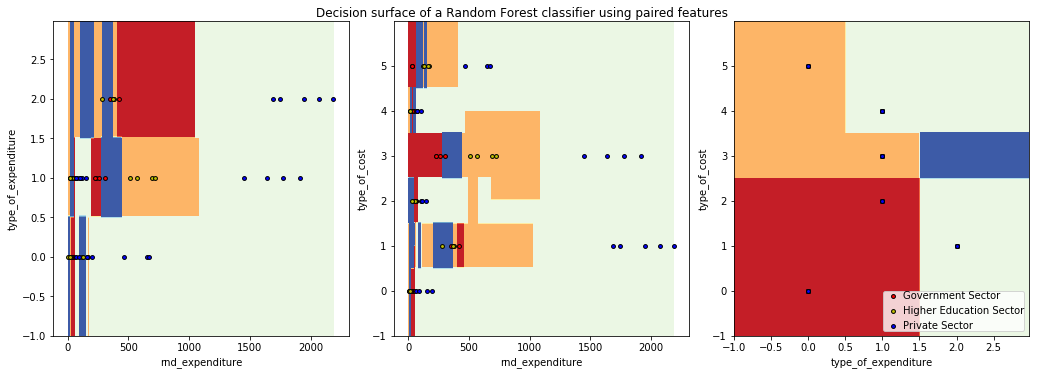

In [200]:
# Plot the decision surface for pair-wise features, using
# the best estimator found by GridSearchCV
best_n_estimators = n_estimators=gs_rfc.best_params_['n_estimators']
best_max_depth = n_estimators=gs_rfc.best_params_['max_depth']

plot_decision_surface(RandomForestClassifier(n_estimators=best_n_estimators,
                                             max_depth=best_max_depth),
                      n_classes, train_X, train_y,
                      "Decision surface of a Random Forest classifier using paired features")

In [205]:
# Train our RFC using the best parameters found
# by GridSearchCV
rfc = RandomForestClassifier(random_state=42, max_depth=7, n_estimators=10)

# fit
rfc.fit(train_X, train_y)

# get the prediction probabilities
# import pdb; pdb.set_trace()
pred_prob_y = rfc.predict_proba(test_X)
print(pred_prob_y)

# predict
pred_y = rfc.predict(test_X)

# evaluation metrics
print(classification_report(test_y, pred_y))
cm = confusion_matrix(test_y, pred_y)
print(cm)

[[0.04444444 0.01111111 0.         0.94444444]
 [0.03333333 0.1        0.         0.86666667]
 [0.11666667 0.04166667 0.80833333 0.03333333]
 [0.8        0.1        0.         0.1       ]
 [0.         0.08       0.92       0.        ]
 [0.56666667 0.16666667 0.00833333 0.25833333]
 [0.         0.3        0.5        0.2       ]
 [0.71666667 0.16666667 0.00833333 0.10833333]
 [0.71666667 0.16666667 0.00833333 0.10833333]
 [0.03333333 0.1        0.         0.86666667]
 [0.         0.2        0.         0.8       ]
 [0.04444444 0.89111111 0.02       0.04444444]
 [0.24       0.4        0.1        0.26      ]
 [0.         0.2        0.         0.8       ]
 [0.03333333 0.1        0.         0.86666667]
 [0.         0.9        0.         0.1       ]
 [0.         0.95       0.         0.05      ]
 [0.         0.         1.         0.        ]
 [0.06666667 0.16666667 0.00833333 0.75833333]
 [0.94444444 0.01111111 0.         0.04444444]
 [0.365      0.125      0.         0.51      ]
 [0.71846154 

## XGBoost Classifier with GridSearchCV
 
Finally, let's try XGBoost on our dataset, to see how well it does.

### Setup

XGBoost is a separate library from sklearn (https://xgboost.readthedocs.io/en/latest/build.html)

```
conda install -c anaconda py-xgboost
```

### XGBoost and Scikit-learn

XGBoost has its own API, but includes an sklearn wrapper for convenience.

https://github.com/dmlc/xgboost/blob/master/demo/guide-python/sklearn_examples.py

In [206]:
import xgboost as xgb

# Use GridSearchCV to select the optimum hyperparameters
gs_xgb = GridSearchCV(xgb.XGBClassifier(), {'max_depth': [2, 4, 6, 8],
                                            'n_estimators': [5, 10, 20, 30]},
                      verbose=1)

gs_xgb.fit(train_X, train_y)

# select the best estimator
print('Best score:', gs_xgb.best_score_)
print('Best parameters:', gs_xgb.best_params_)

# predict
pred_y = gs_xgb.predict(test_X)

# evaluation metrics
print(classification_report(test_y, pred_y))
cm = confusion_matrix(test_y, pred_y)
print(cm)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\issohl\AppData\Local\Continuum\miniconda3\e

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\issohl\AppData\Local\Continuum\miniconda3\e

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\issohl\AppData\Local\Continuum\miniconda3\e

Best score: 0.6222222222222222
Best parameters: {'max_depth': 8, 'n_estimators': 30}
             precision    recall  f1-score   support

          0       0.17      0.17      0.17         6
          1       0.36      0.50      0.42        10
          2       1.00      0.50      0.67         6
          3       0.29      0.25      0.27         8

avg / total       0.43      0.37      0.38        30

[[1 4 0 1]
 [2 5 0 3]
 [1 1 3 1]
 [2 4 0 2]]


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\issohl\AppData\Local\Continuum\miniconda3\e

In [209]:
from sklearn.ensemble import GradientBoostingClassifier

# Use GridSearchCV to select the optimum hyperparameters
gs_gb = GridSearchCV(GradientBoostingClassifier(random_state=42),
                     {'max_depth': [2, 4, 6, 8],
                      'n_estimators': [5, 10, 20, 30]},
                      verbose=1)

gs_gb.fit(train_X, train_y)

# select the best estimator
print('Best score:', gs_gb.best_score_)
print('Best parameters:', gs_gb.best_params_)

# predict
pred_y = gs_gb.predict(test_X)

# evaluation metrics
print(classification_report(test_y, pred_y))
cm = confusion_matrix(test_y, pred_y)
print(cm)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best score: 0.6555555555555556
Best parameters: {'max_depth': 8, 'n_estimators': 30}
             precision    recall  f1-score   support

          0       0.20      0.17      0.18         6
          1       0.36      0.40      0.38        10
          2       1.00      0.83      0.91         6
          3       0.33      0.38      0.35         8

avg / total       0.45      0.43      0.44        30

[[1 4 0 1]
 [2 4 0 4]
 [0 0 5 1]
 [2 3 0 3]]


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.8s finished


## Workshop: Regression with Decision Trees

In this workshop, we will apply decision tree-related algorithms to a multi-variate linear regression problem.

## Goal

Train a regression model to predict the `Lifetime Post Total Reach` of a Facebook post to seven input features (category, page total likes, type, month, hour, weekday, paid).

## Dataset

#### Facebook metrics Data Set

https://archive.ics.uci.edu/ml/datasets/Facebook+metrics

The data is related to posts' published during the year of 2014 on the Facebook's page of a renowned cosmetics brand.

1. Download dataset from the above URL
2. Extract the folder and note the path for use in read_csv below.

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/Facebook_metrics/dataset_Facebook.csv',
                 delimiter=';',
                 usecols=['Page total likes', 'Type', 'Category',
                         'Post Month', 'Post Weekday', 'Post Hour', 'Paid',
                         'Lifetime Post Total Reach'])
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach
0,139441,Photo,2,12,4,3,0.0,2752
1,139441,Status,2,12,3,10,0.0,10460
2,139441,Photo,3,12,3,3,0.0,2413
3,139441,Photo,2,12,2,10,1.0,50128
4,139441,Photo,2,12,2,3,0.0,7244


## Prepare Dataset

### Handle NaN values

Check for NaN values and decide what to do with them.

### Convert string columns

There are two options for the `Type` column.
  1. Convert to dummy columns.
  2. Encode the labels to numbers.

Either option is fine because the number of labels is small (4). Since we've demonstrated label encoding, we'll try the dummy column approach.

### Balance dataset

This is a regression task, so we don't need to balance the `Lifetime Post Total Reach` output, because it is a continuous variable.
- Instead, we'll check that the discrete columns (`Type`, `Category`, `Paid`) values are balanced.
- It's less critical, but a good idea to also check the `Post Month`, `Post Weekday` and `Post Hour` columns, just in case.

### Handle NaN values

Check for NaN values and decide what to do with them.

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Page total likes             500 non-null int64
Type                         500 non-null object
Category                     500 non-null int64
Post Month                   500 non-null int64
Post Weekday                 500 non-null int64
Post Hour                    500 non-null int64
Paid                         499 non-null float64
Lifetime Post Total Reach    500 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 31.3+ KB


In [81]:
df[df.isnull().any(axis=1)]

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach
499,81370,Photo,2,1,4,4,NaN,4188


In [83]:
df.dropna(inplace=True)

### Convert string columns

Convert `Type` to dummy columns and append to DataFrame

In [84]:
df_type_dummies = pd.get_dummies(df['Type'])
df_type_dummies.head()

,Link,Photo,Status,Video
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [85]:
# Append to existing dataset
df = pd.concat([df, df_type_dummies], axis=1)
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Link,Photo,Status,Video
0,139441,Photo,2,12,4,3,0.0,2752,0,1,0,0
1,139441,Status,2,12,3,10,0.0,10460,0,0,1,0
2,139441,Photo,3,12,3,3,0.0,2413,0,1,0,0
3,139441,Photo,2,12,2,10,1.0,50128,0,1,0,0
4,139441,Photo,2,12,2,3,0.0,7244,0,1,0,0


## Balance dataset

Check that these discrete columns are balanced
- `Type`
- `Category`
- `Paid`

Optionally, check that these discrete columns are balanced
- `Post Month`
- `Post Weekday`
- `Post Hour`

Balanced means that the counts for each discrete values are not overly biased to one or two values. As a rule of thumb, overly means 10x or larger.

In [86]:
# Detect if the `Type` column is balanced
df['Type'].value_counts()

Photo     425
Status     45
Link       22
Video       7
Name: Type, dtype: int64

In [87]:
# Instead of dropping all the columns, let's reduce just the `Photo` rows by a random sample of 90 entries
num_photo_rows = 90
photos_df = df.loc[df.Type == 'Photo']

indices_to_keep = photos_df.sample(num_photo_rows).index # random sample the indices
indices_to_drop = list(set(photos_df.index) - set(indices_to_keep))

balanced_df = df.drop(df.index[indices_to_drop])

In [89]:
balanced_df['Type'].value_counts()

Photo     90
Status    45
Link      22
Video      7
Name: Type, dtype: int64

In [90]:
balanced_df['Category'].value_counts()

1    64
2    56
3    44
Name: Category, dtype: int64

In [91]:
balanced_df['Paid'].value_counts()

0.0    125
1.0     39
Name: Paid, dtype: int64

In [92]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 1 to 495
Data columns (total 12 columns):
Page total likes             164 non-null int64
Type                         164 non-null object
Category                     164 non-null int64
Post Month                   164 non-null int64
Post Weekday                 164 non-null int64
Post Hour                    164 non-null int64
Paid                         164 non-null float64
Lifetime Post Total Reach    164 non-null int64
Link                         164 non-null uint8
Photo                        164 non-null uint8
Status                       164 non-null uint8
Video                        164 non-null uint8
dtypes: float64(1), int64(6), object(1), uint8(4)
memory usage: 12.2+ KB


In [93]:
# Label Encode
type_le = LabelEncoder()
balanced_df.Type = type_le.fit_transform(balanced_df.Type)

## Select Features

Select the features X and y from `balanced_df`.

In [94]:
X = balanced_df.loc[:, balanced_df.columns != 'Lifetime Post Total Reach']
y = balanced_df['Lifetime Post Total Reach']

print(X.shape, y.shape)

(164, 11) (164,)


## Train the Decision Tree Regressor

1. Shuffle and split the data set into train and test
2. Train a `DecisionTreeRegressor`

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

X_scaler = StandardScaler()
train_X_scaled = X_scaler.fit_transform(train_X)
test_X_scaled = X_scaler.transform(test_X)

y_scaler = StandardScaler()
train_y_scaled = y_scaler.fit_transform(train_y.values.reshape(-1, 1))
test_y_scaled = y_scaler.transform(test_y.values.reshape(-1, 1))

# comparison: linear regressor
lin = LinearRegression()
lin.fit(train_X_scaled, train_y_scaled)
pred_y_scaled = lin.predict(test_X_scaled)
print('MSE', mean_squared_error(test_y_scaled, pred_y_scaled),
      'R2', r2_score(test_y_scaled, pred_y_scaled))
print(pred_y_scaled)

dtr = DecisionTreeRegressor(max_depth=6, max_leaf_nodes=10)
dtr.fit(train_X, train_y_scaled)
pred_y_scaled = dtr.predict(test_X_scaled)

print('MSE', mean_squared_error(test_y_scaled, pred_y_scaled),
      'R2', r2_score(test_y_scaled, pred_y_scaled))
print(pred_y_scaled)

MSE 0.46014398138632684 R2 0.23677646873665914
[[ 0.16259957]
 [-0.02338074]
 [-0.00974091]
 [ 0.14830979]
 [-0.14958954]
 [-0.39499977]
 [ 0.90803209]
 [-0.29069605]
 [-0.13537843]
 [ 0.30993971]
 [-0.37518366]
 [-0.1005316 ]
 [ 1.87107439]
 [ 0.0029524 ]
 [-0.13101845]
 [-0.2212297 ]
 [ 0.33621308]
 [-0.16939217]
 [ 0.37700316]
 [-0.3654733 ]
 [-0.12667529]
 [-0.33229481]
 [-0.34773364]
 [-0.25913781]
 [ 2.06732757]
 [ 0.63305615]
 [-0.19339233]
 [-0.15913986]
 [ 0.23247   ]
 [ 0.31170553]
 [ 0.31331977]
 [-0.41629308]
 [ 0.04381023]
 [-0.03655909]
 [-0.31428595]
 [-0.15919421]
 [-0.15107354]
 [-0.09822534]
 [ 1.71178267]
 [ 0.28270942]
 [ 2.08334637]]
MSE 6.24706872545956 R2 -9.36177815110221
[-0.33426768 -0.33426768 -0.33426768  4.71358557 -0.33426768 -0.33426768
  4.71358557 -0.33426768 -0.33426768 -0.33426768 -0.33426768 -0.33426768
  5.25922589  4.71358557 -0.33426768 -0.33426768 -0.33426768 -0.33426768
 -0.33426768 -0.33426768  4.71358557 -0.33426768 -0.33426768 -0.33426768
  5

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [124]:
# http://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

estimator = dtr

# The decision estimator has an attribute called tree_  which stores the entire
# tree structure and allows access to low level attributes. The binary tree
# tree_ is represented as a number of parallel arrays. The i-th element of each
# array holds information about the node `i`. Node 0 is the tree's root. NOTE:
# Some of the arrays only apply to either leaves or split nodes, resp. In this
# case the values of nodes of the other type are arbitrary!
#
# Among those arrays, we have:
#   - left_child, id of the left child of the node
#   - right_child, id of the right child of the node
#   - feature, feature used for splitting the node
#   - threshold, threshold value at the node
#

# Using those arrays, we can parse the tree structure:

n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

# First let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.

node_indicator = estimator.decision_path(test_X_scaled)

# Similarly, we can also have the leaves ids reached by each sample.

leave_id = estimator.apply(test_X_scaled)

# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] != node_id:
        continue

    if (test_X_scaled[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision id node %s : (X_test[%s, %s] (= %s) %s %s)"
          % (node_id,
             sample_id,
             feature[node_id],
             test_X_scaled[sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

# For a group of samples, we have the following common node.
sample_ids = [0, 1]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                len(sample_ids))

common_node_id = np.arange(n_nodes)[common_nodes]

print("\nThe following samples %s share the node %s in the tree"
      % (sample_ids, common_node_id))
print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))

The binary tree structure has 19 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 10] <= 0.5 else to node 2.
	node=1 test node: go to node 5 if X[:, 0] <= 118481.0 else to node 6.
	node=2 test node: go to node 3 if X[:, 4] <= 2.5 else to node 4.
		node=3 leaf node.
		node=4 leaf node.
		node=5 test node: go to node 7 if X[:, 5] <= 2.5 else to node 8.
		node=6 leaf node.
			node=7 test node: go to node 9 if X[:, 6] <= 0.5 else to node 10.
			node=8 test node: go to node 11 if X[:, 3] <= 3.5 else to node 12.
				node=9 leaf node.
				node=10 leaf node.
				node=11 leaf node.
				node=12 test node: go to node 13 if X[:, 2] <= 1.5 else to node 14.
					node=13 leaf node.
					node=14 test node: go to node 15 if X[:, 0] <= 117099.5 else to node 16.
						node=15 leaf node.
						node=16 test node: go to node 17 if X[:, 4] <= 3.5 else to node 18.
							node=17 leaf node.
							node=18 leaf node.

Rules used to predict sample 0: 
decision id node 9 : (X_tes

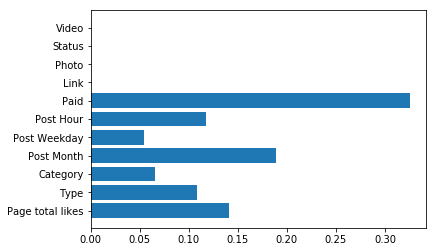

In [170]:
n_features = len(X.columns)

plt.barh(range(n_features), dtr.feature_importances_)
plt.yticks(range(n_features), X.columns);

Note: if you want to silence the warning about int64, you can use something like this to convert to int32:

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.astype.html
    
```
df['Page total likes'] = df['Page total likes'].astype('int32')
```

## Evaluate Metrics: Regression

We'll now plot the learning curve for regression to see how well the decision tree performed

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(axis, title, tr_sizes, tr_scores, val_scores):
    """Plots the learning curve for a training session
    Arg:
        axis: axis to plot
        title: plot title
        tr_sizes: sizes of the training set
        tr_scores: training scores
        val_scores: validation scores
    """
    tr_scores_mean = np.mean(tr_scores, axis=1)
    tr_scores_std = np.std(tr_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)
    
    axis.fill_between(tr_sizes, tr_scores_mean - tr_scores_std,
                    tr_scores_mean + tr_scores_std, alpha=0.1,
                    color="r")
    axis.fill_between(tr_sizes, val_scores_mean - val_scores_std,
                    val_scores_mean + val_scores_std, alpha=0.1, color="g")
    axis.plot(tr_sizes, tr_scores_mean, 'o-', color="r",
            label="Training score")
    axis.plot(tr_sizes, val_scores_mean, 'o-', color="g",
            label="Cross-validation score")
    axis.set(title=title,
           xlabel='Training examples',
           ylabel='R2 Scores')
    axis.grid()
    axis.legend()

In [ ]:
# Generate the learning curve for decision tree classifier, using 3-fold Cross Validation
train_sizes, train_scores, validation_scores = learning_curve(
    DecisionTreeRegressor(random_state=42), train_X, train_y,
    random_state=42)

fig, ax = plt.subplots(figsize=(15, 8))

plot_learning_curve(ax, 'Learning Curve: Decision Tree Regressor',
                    train_sizes, train_scores, validation_scores)

The Training R2 Score is constant. Can you think of a reason why?

hint: consider how a decision tree would be created on the training set

In [ ]:
train_scores

The Validation R2 score isn't very good.

Ways to improve:
- Try Random Forest or XGBoost (typically will perform better)
- Use a non-decision tree algorithm (Linear Regression, anyone?)

In [ ]:
validation_scores

## Visualizing the Decision Tree

Finally, we'll visualize the decision tree.

This tree will look very complicated, because:
1. There are many features
2. We didn't place any limits on max_depth (which we should to make the tree more robust and less likely to overfit)

In [121]:
feature_names = list(balanced_df.columns)
feature_names.remove('Lifetime Post Total Reach')
target_names = 'Lifetime Post Total Reach'

filename = '../data/Facebook_metrics/facebook_likes_regressor_maxdepth6_maxleaf10_noscale.dot'

visualize_tree(dtr, feature_names, target_names, filename)

## Optional Exercises

This is a loooong workshop, but if you desire to learn more about Decision Trees, try the following:

1. XGBoost regression
 - Replace `DecisionTreeRegressor()` with `xgb.Regressor()` with optional `GridSearchCV()`
 - https://github.com/dmlc/xgboost/blob/master/demo/guide-python/sklearn_examples.py
 
2. Random Forest Regressor
 - Replace `DecisionTreeRegressor()` with `RandomForestRegressor()` with optional `GridSearchCV()`

3. Try other Decision Tree algorithms.

## Decision Tree Algorithms

ID3: basic algorithm (Iterative Dichotomiser 3)

C4.5: ID3 + if-then rules and continuous variable support

CART: (what sklearn uses). C4.5, adapted for classification and regression trees.

(CART = Classification And Regression Trees)

Reference: http://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart

### ID3

https://www.cise.ufl.edu/~ddd/cap6635/Fall-97/Short-papers/2.htm

Iterative algorithm
- Select a feature and threshold (e.g. rnd_expenditure <= 1.416)
- Split the nodes
- Repeat for children until tree is created
- Compute Entropy (how much information is gained from the split)
   
   $$Entropy(S)=\sum _{x\in X}-p(x)\log _{2}p(x)$$
   
   - S: data set
   - X: classes or discrete values
   - p(x): number of elements in class x, divided by number of elements in S


   - Entropy(S) = 0: all elements are of the same class / discrete value
   - Entropy(S) = 1: random (not classified / regressed)